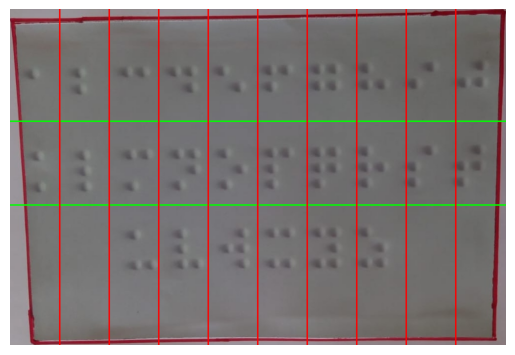

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cropped_box_image.jpg')  # Replace 'your_image.jpg' with the path to your image

# Define the number of rows and columns
num_rows = 3  # Adjust as needed
num_cols = 10  # Adjust as needed

# Calculate the height and width of each row and column
height, width, _ = image.shape

# Define custom row heights (adjust as needed)
row_heights = [height // 3, height // 4, height // 4, height // 4]

# Create a list to store individual boxes
boxes = []

# Draw horizontal lines and extract boxes
for i in range(1, num_rows):
    y = sum(row_heights[:i])  # Calculate the cumulative height
    cv2.line(image, (0, y), (width, y), (0, 255, 0), 2)  # (0, 255, 0) is the color in BGR format
    if i < num_rows - 1:
        box = image[y:y+row_heights[i], 0:width]
        boxes.append(box)

# Extract the first row which is not a box
first_row = image[0:row_heights[0], 0:width]

# Draw vertical lines and extract boxes
for j in range(1, num_cols):
    x = j * (width // num_cols)
    cv2.line(image, (x, 0), (x, height), (0, 0, 255), 2)  # (0, 0, 255) is the color in BGR format
    for i in range(num_rows - 1):
        box = image[sum(row_heights[:i]):sum(row_heights[:i+2]), x - (width // num_cols):(x + (width // num_cols))]
        boxes.append(box)

# Save the image with lines drawn
cv2.imwrite('output_image.jpg', image)  # Replace 'output_image.jpg' with the desired output file path

# Display the image in the same terminal
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Now, you have a list of individual boxes in the 'boxes' variable, and the first row is in the 'first_row' variable.


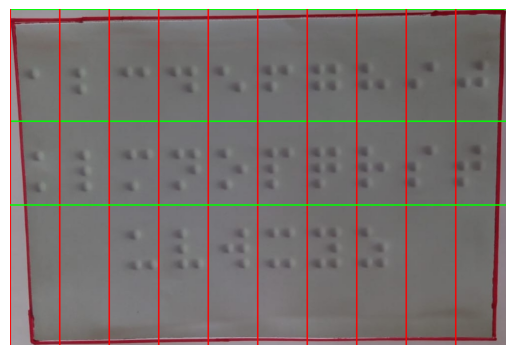

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
image = cv2.imread('cropped_box_image.jpg')  # Replace 'your_image.jpg' with the path to your image

# Define the number of rows and columns
num_rows = 3  # Adjust as needed
num_cols = 10  # Adjust as needed

# Calculate the height and width of the image
height, width, _ = image.shape

# Define custom row heights (adjust as needed)
row_heights = [height // 3, height // 4, height // 4, height // 4]

# Create a list to store individual boxes
boxes = []

# Create a directory to store individual box images
output_directory = 'box_images'
os.makedirs(output_directory, exist_ok=True)

# Draw horizontal lines and extract boxes
box_counter = 1
for i in range(num_rows):
    y1 = sum(row_heights[:i])
    y2 = sum(row_heights[:i+1])
    
    for j in range(num_cols):
        x1 = j * (width // num_cols)
        x2 = (j + 1) * (width // num_cols)
        
        cv2.line(image, (x1, 0), (x1, height), (0, 0, 255), 2)  # Vertical lines
        cv2.line(image, (0, y1), (width, y1), (0, 255, 0), 2)  # Horizontal lines
        
        box = image[y1:y2, x1:x2]
        
        # Save each box as an individual image
        output_filename = os.path.join(output_directory, f'{box_counter}.jpg')
        cv2.imwrite(output_filename, box)
        
        box_counter += 1

# Save the image with lines drawn
cv2.imwrite('output_image.jpg', image)  # Replace 'output_image.jpg' with the desired output file path

# Display the image in the same terminal
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Now, you have each element stored as an individual image in the 'box_images' directory, named from 1 to 30.


In [1]:
import cv2
import os

def extract_sub_images(input_image_path, num_rows, num_cols):
    # Load the image
    image = cv2.imread(input_image_path)
    
    # Calculate the height and width of the image
    height, width, _ = image.shape
    
    # Define custom row heights (adjust as needed)
    row_heights = [height // num_rows] * num_rows
    
    # Create a list to store individual boxes
    boxes = []

    for i in range(num_rows):
        y1 = sum(row_heights[:i])
        y2 = sum(row_heights[:i + 1])

        for j in range(num_cols):
            x1 = j * (width // num_cols)
            x2 = (j + 1) * (width // num_cols)

            box = image[y1:y2, x1:x2]
            boxes.append(box)

    return boxes

# Example usage of the function
input_image_path = 'cropped_box_image.jpg'
num_rows = 3
num_cols = 10

sub_images = extract_sub_images(input_image_path, num_rows, num_cols)
